In [3]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/Users/charisoneyemi/Downloads/611Assignment/Dataset/creditcard.csv')

# Displaying basic info about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### PREPROCESSING

In [4]:
# Checking for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Checking for duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 1081


In [6]:
#Since we have 1081 duplicated rows, I'll drop them and still assign them to the dataframe df
df = df.drop_duplicates()
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows after removal: 0


### EDA

In [7]:
# Showing data types
print(df.dtypes)


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [8]:
# 'Class' is our target column it contains two values 0 and 1. 0s (non-fraud) and 1s (fraud)

print(df['Class'].value_counts()) 
#This counts the number of occurrences for each unique value in the 'Class' column.

Class
0    283253
1       473
Name: count, dtype: int64


This tells us there are 283,253 normal transactions and 473 fraudulent ones (highly imbalanced!).


In [9]:
print(df['Class'].value_counts(normalize=True) * 100)  # Percentage
#This normalizes the counts, showing them as percentages instead of absolute counts 
# ie it converts the raw counts into proportions (percentages) so that we can compare them more easily.


Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


Now we see that approximately 0.17% of the transactions are fraudulent, which highlights the class imbalance and this will affect the model

/var/folders/cl/ff5rh4051lng0tpll0yl64q40000gn/T/ipykernel_27624/1940823457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette=['purple', 'pink'])


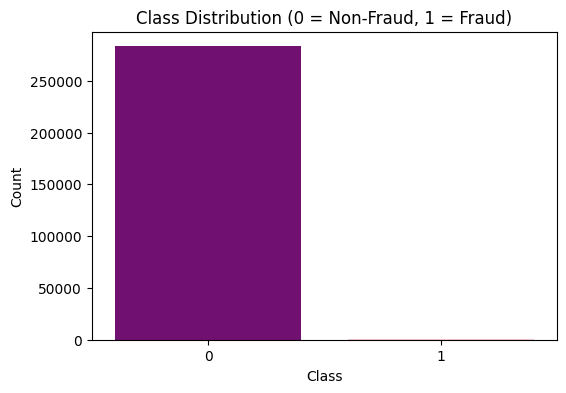

In [10]:
#Visualizing Class Imbalance: This will help us to see the imbalance clearly
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'], palette=['purple', 'pink'])
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
#Feature Scaling
#We need to scale Amount and Time since the other features (V1 to V28) are already transformed (PCA components).

""" Feature Scaling is the process of transforming numerical features so that they have a similar scale or range. 
This helps machine learning models learn patterns more effectively and prevents one feature from dominating the learning process 
due to its larger values """

from sklearn.preprocessing import StandardScaler
#Basically, StandardScaler is a class inside the sklearn.preprocessing submodule which is in the python ML library scikit learn aka sklearn

# Copying the dataframe to avoid modifying the original in case we need to use the original data later
df_scaled = df.copy()

# Initializing the scaler
my_scaler = StandardScaler()
"""
my_scaler is just a variable name that holds an instance of the StandardScaler class.

Here I basically initialised an instance (my_scaler) of the class StandardScaler which will later be used to 
transform the 'Amount' and 'Time' columns.

It will transform the 'Amount' and 'Time' columns to have a mean of 0 and a standard deviation of 1.

So, after applying StandardScaler, the values in these columns will be rescaled to follow a standard normal distribution 
(bell curve shape, centered at 0).


Before scaling:
Amount and Time have their original values (e.g., $149.62, $2.69, 128914 and 22 seconds).
These values are obviously on different scales, which can negatively affect machine learning models.

After scaling:
The values will be rescaled so that their mean is 0, and their standard deviation is 1.
This makes sure that no single feature dominates just because it has larger numbers.
"""




# Scale 'Amount' and 'Time'
df_scaled[['Amount', 'Time']] = my_scaler.fit_transform(df_scaled[['Amount', 'Time']])

"""
df_scaled[['Amount', 'Time']]

Basically, it selects the 'Amount' and 'Time' columns from df_scaled.
We're only applying scaling to these two columns (leaving the others unchanged) like I earlier stated


my_scaler.fit_transform(...) learns or let's say calculates the original means and SDs of the amount and time column 
and then transforms it to means of 0s and SDs of 1

Then the transformed (scaled) values replace the original 'Amount' and 'Time' values in df_scaled
"""


# Checking the transformed data
df_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


/var/folders/cl/ff5rh4051lng0tpll0yl64q40000gn/T/ipykernel_27624/2449334777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette=['purple', 'pink'])


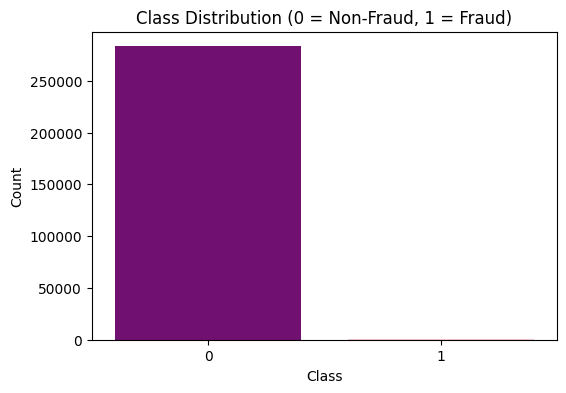

In [12]:
# Plotting class distribution again
plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'], palette=['purple', 'pink'])
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##### Now, I'll handle the class imbalance

Because the dataset is highly imbalanced, that is, there are way more non-fraud transactions than fraud ones, we need to address this before training our models. Otherwise, the model might just predict "non-fraud" all the time and still achieve high accuracy (but be useless at detecting fraud).

There are two main techniques to fix this:

- Undersampling – Removing some non-fraud cases to balance the dataset.
- Oversampling – Adding more fraud cases by duplicating them or generating synthetic ones (like SMOTE).
I'm going to use SMOTE (Synthetic Minority Over-sampling Technique) since it’s better than just duplicating data.

In [ ]:
from imblearn.over_sampling import SMOTE  
"""
so imblearn is the short for imbalanced_learn which is a python library and I imported smote which is a technique 
that creates new synthetic examples for the minority class (in this case fraudulent transactions (Class = 1) )
to balance the dataset from imblearn.over_sampling which is a submodule in imblearn 

I already did pip install imbalanced-learn in my virtual environment on my terminal
"""

# Splitting data into features (X) and target (y)
X = df_scaled.drop(columns=['Class'])  # All columns except 'Class'
y = df_scaled['Class']  # Target variable ie 'Class'

# Applying SMOTE to generate synthetic fraud cases
my_smote = SMOTE(random_state=42)  
X_resampled, y_resampled = my_smote.fit_resample(X, y)

"""
my_smote = SMOTE(random_state=42)  
I created an instance of the class SMOTE which is my_smote and I assigned a random state 42 is just the number I chose
It can be any number. The purpose of random state is so that everytime we run the code our result won't be different
because of the SMOTE running creating synthetic samples


X_resampled, y_resampled = my_smote.fit_resample(X, y)

X are our features and y is pur target variable 'Class'

fit_resample(X, y) goes through the dataset to identify the imbalance and identifies the minority class,
it keeps the majority class the same but creates synthetic samples for the minority class using the instance I created
ie my_smote for the SMOTE technique


It then assigns the values to X_resampled, y_resampled
"""

# Checking the new class distribution. It will just print the number of samples in each class after applying SMOTE.
print(y_resampled.value_counts())


/opt/anaconda3/envs/tools_611assignment/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class
0    283253
1    283253
Name: count, dtype: int64


/var/folders/cl/ff5rh4051lng0tpll0yl64q40000gn/T/ipykernel_27624/3067147376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=['purple', 'pink'])


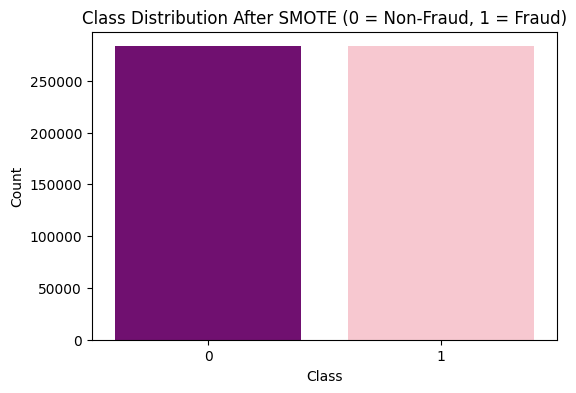

In [14]:
#Plotting for better visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette=['purple', 'pink'])
plt.title('Class Distribution After SMOTE (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Now the dataset is perfectly balanced, with an equal number of fraudulent (1) and non-fraudulent (0) transactions

The Next Step is to split the dataset into Training & Testing Sets

I'm using 80:20

It's also good practice to split it into 3 ie Training, testinga and validation but I'll just do training and testing for this assignment

In [15]:
from sklearn.model_selection import train_test_split
#I'm just importing the train_test_split function from sklearn.model_selection

# Splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
# I used stratify because I want to maintain the same class distribution in both training and testing sets.
# I've already done SMOTE to balance it w/o stratify, it might end up imbalanced again

# I'm just running the below to confirm that the dataset was split correctly (80% train, 20% test)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (453204, 30) (453204,)
Testing set shape: (113302, 30) (113302,)


In class we used the following models:
Decision Tree
Gradient Boosting
Logistic Regression
Random Forest

Since it has to be 5 models other than these, I will be using the following

1. Support Vector Machine (SVM)
2. K-Nearest Neighbors (KNN)
3. Naive Bayes
4. Artificial Neural Network (MLP - Multi-Layer Perceptron)
5. XGBoost (Extreme Gradient Boosting)

# SVM

SVM (Support Vector Machine) is a powerful supervised learning algorithm mainly used for classification and regression tasks. Our task here is a classification task, we can see that even from our target feature 'Class' not because of teh name but the values are 0 and 1 which shows the class each belongs to

The key idea behind SVM is to find the best decision boundary (hyperplane) that separates the different classes in the dataset.

from sklearn.svm import SVC
from sklearn.metrics import classification_report

"""
sklearn.svm is the submodule that provides suppport vector machines and SVC ie support vector classifier
is a class inside sklearn.svm used for classification task. it's used to create and train SVC models

sklearn.metrics is a module in scikit learn that is used for evaluating the performance of ML models
classification_report is basically a report that generates how well the model is doing. It includes:
precision, recall, f1 score and support
"""


# Initializing and training the model
my_svm_model = SVC(kernel='linear', random_state=42)
my_svm_model.fit(X_train, y_train)

"""
SVC(...) just initialises the svm classifier svc
I chose linear because i'm assuming it tries to separate fraud (1) and non-fraud (0) using a straight line
If the dataset had only two features, I could plot them on a scatter plot and see if I can draw a straight line 
to separate fraud vs. non-fraud. 
But our dataset has many features (V1–V28, Amount, Time), making it impossible to visualize in 2D or 3D.

After training the SVM model with a linear kernel and evaluating its accuracy, precision, recall, and F1-score.
If it performs well, then a linear decision boundary might be enough.
If it performs poorly, the data is likely not linearly separable, and I would try a non-linear kernel

my_svm_model.fit(X_train, y_train)
This is just basically training the svm model using the X_train and the y_train dataset and then it tries ti find
the best fit line to seperate the non fraud from fraud cases.
"""

# Making predictions
y_pred_svm = my_svm_model.predict(X_test)

"""
Here, I'm using the trained SVM model my_svm_model to predict what class each row in the X_test dataset belongs to
I then assign it to be stored in y_pred_svm
"""

# Evaluating the model
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))
"""
This just compares the actual labels (y_test) with the predicted (y_pred_svm) and then generates a classification_report
"""


In [16]:
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [17]:
from sklearn.svm import SVC

my_svm_model = SVC(kernel='linear', random_state=42)

# Training on a smaller sample
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

my_svm_model.fit(X_train_sample, y_train_sample) 


SVC(kernel='linear', random_state=42)

In [18]:
# Making predictions
y_pred_svm = my_svm_model.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))


SVM Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56651
           1       0.98      0.91      0.94     56651

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



My original dataset was too large (284,808 rows) for a linear SVM, which is not very efficient on large datasets which was why i decided to train on a smaller dataset of 10k

# KNN

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks in our case a classification task

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

"""
sklearn.neighbors is a submodule in the scikit-learn package that holds the class KNeighborsClassifier which
implements the K-Nearest Neighbors (KNN) algorithm for classification.


sklearn.metrics is a module in scikit learn that is used for evaluating the performance of ML models
classification_report is basically a report that generates how well the model is doing. It includes:
precision, recall, f1 score and support
"""


# Initializing KNN with k=5 
knn_model = KNeighborsClassifier(n_neighbors=5)

"""
I'm initializing the KNeighborsClassifier class and storing in a variable knn_model with the parameter n_neighbours = 5
which just means that the model will use 5 nearest neighbors to make predictions.
"""

# Training on the same sample I used for SVM to keep things fair
knn_model.fit(X_train_sample, y_train_sample)

"""
.fit(X_train_sample, y_train_sample) → This trains the KNN model using the training sample 
(X_train_sample, y_train_sample). It stores the training data so that when making predictions, 
it can calculate distances to find the nearest neighbors.
"""

# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)
"""
We are using our trained knn_model to predict labels for the test set X_test.
The predicted labels will be stored in y_pred_knn.
"""

# Evaluating KNN model performance
print("KNN Model Performance:")
print(classification_report(y_test, y_pred_knn))

#classification_report(y_test, y_pred_knn) will compare actual labels (y_test) vs. predicted labels (y_pred_knn)





KNN Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.97      1.00      0.98     56651

    accuracy                           0.98    113302
   macro avg       0.99      0.98      0.98    113302
weighted avg       0.99      0.98      0.98    113302



Interpretation of KNN Model Performance
The KNN model performed very well, achieving 98% accuracy

1. Overall Accuracy:
98% accuracy: The model correctly predicted fraud/non-fraud for 98% of the test cases.


2. Class-wise Performance:
Class 0 (Non-Fraud)
Precision: 1.00, When the model predicts "Non-Fraud," it's correct 100% of the time.
Recall: 0.97, The model found 97% of all actual non-fraud cases.
F1-score: 0.98, A good balance between precision and recall.

Class 1 (Fraud)
Precision: 0.97, When the model predicts "Fraud," it's correct 97% of the time.
Recall: 1.00, The model detected 100% of actual fraud cases.
F1-score: 0.98, Again, a strong balance.

3. Macro & Weighted Averages
Macro avg (0.99, 0.98, 0.98), Shows balanced performance.
Weighted avg (0.99, 0.98, 0.98), Takes into account the number of instances in each class.


KNN vs. SVM:
The KNN model outperformed SVM (which had 95% accuracy), especially in detecting fraud cases (Class 1).
This suggests that fraud cases have closer patterns to each other, making KNN (which finds nearest neighbors) a great choice.

# Naïve Bayes


In [20]:
from sklearn.naive_bayes import GaussianNB

"""
sklearn.naive_bayes is a submodule in scikit-learn that provides different types of Naïve Bayes classifiers.
GaussianNB: A version of Naïve Bayes that assumes the data follows a Gaussian (normal) distribution
"""

nb_model = GaussianNB()
#This creates an instance of the GaussianNB classifier and it will be stored in the variable nb_model
#which will be used to train and make predictions.

nb_model.fit(X_train_sample, y_train_sample)
""".fit() trains the Naïve Bayes model using the training data (X_train_sample) and labels (y_train_sample).
During training, the model:
- Calculates the probability of each class (0 = non-fraud, 1 = fraud).
- Assumes each feature follows a Gaussian (normal) distribution.
- Uses Bayes Theorem to determine how likely a transaction is fraud based on its features."""

y_pred_nb = nb_model.predict(X_test)
#This predicts whether each test instance is fraud (1) or non-fraud (0).


print("Naïve Bayes Model Performance:")
print(classification_report(y_test, y_pred_nb))




Naïve Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56651
           1       0.97      0.85      0.91     56651

    accuracy                           0.91    113302
   macro avg       0.92      0.91      0.91    113302
weighted avg       0.92      0.91      0.91    113302



INTERPRETATION

1. High Precision (0.97) for Fraud Cases (Class 1)

When the model predicts a transaction as fraud, 97% of the time, it is correct.
This is great because it minimizes false fraud alerts (false positives).


2. Lower Recall (0.85) for Fraud Cases

The model misses 15% of actual fraud cases (false negatives).
Meaning, some fraudulent transactions go undetected.
In fraud detection, high recall is critical—you don’t want to miss actual fraud!


3. Balanced F1-score (~0.91 for both classes)

The model balances precision and recall well.
Overall, it performs decently but could improve.


4. Overall Accuracy: 91%

91% of transactions are classified correctly but accuracy alone isn’t enough since fraud cases are rare.

So the question we can ask is: Is Naïve Bayes Good for Fraud Detection?
- It performed okay but recall for fraud (1) is low.
- It misses too many fraud cases, which is risky.

What we can do is to tune Naïve Bayes hyperparameters.
Consider another model (Decision Trees, Neural Networks, etc.) or use ensemble methods

# Multi-Layer Perceptron (MLP - Neural Network)

In [21]:
from sklearn.neural_network import MLPClassifier
#importing the MLPClassifier class from the sklearn.neural_network submodule in scikit-learn.

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_sample, y_train_sample)
"""
I'm initializing the MLPClassifier and storing it in mlp_model
I set the hidden layer to have 100 neurons, I just have 1 hidden layer
I also set the number of maximum iterations to be 300 and the random state just for consistency

I then  train the MLP model using the provided training features (X_train_sample) and training labels (y_train_sample).
"""

y_pred_mlp = mlp_model.predict(X_test)
#I'm using the trained model to predict the test dataset and storing it in y_pred_mlp

print("MLP Model Performance:")
print(classification_report(y_test, y_pred_mlp))
# This just shows the classification report comparing the true labels (y_test) to the predicted labels (y_pred_mlp)


MLP Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.99      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



This model is extremely strong, but this level of accuracy is suspicious because real-world fraud detection models rarely get 100% accuracy because of complex patterns so there's a possibility of overfitting, that is the model learned too well from the training data but may not generalize well to new, unseen data.

# XGBoost (Extreme Gradient Boosting)

In [22]:
from xgboost import XGBClassifier
# I did a pip install xgboost on my terminal
# I'm importimg the XGBClassifier classification model from XGBoost


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sample, y_train_sample)

y_pred_xgb = xgb_model.predict(X_test)


print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))


/opt/anaconda3/envs/tools_611assignment/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:13:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.99      1.00      0.99     56651

    accuracy                           0.99    113302
   macro avg       0.99      0.99      0.99    113302
weighted avg       0.99      0.99      0.99    113302



Class 0 (Non-Fraud Transactions)
Precision = 1.00 → When the model predicts a transaction is non-fraud, it is correct 100% of the time.
Recall = 0.99 → Out of all actual non-fraud transactions, the model correctly identifies 99%.
F1-score = 0.99 → A great balance between precision and recall.

Class 1 (Fraud Transactions)
Precision = 0.99 → When the model predicts fraud, it's correct 99% of the time.
Recall = 1.00 → The model correctly identifies 100% of actual fraud cases, meaning no fraud cases were missed!
F1-score = 0.99 → The model is almost perfect at identifying fraud while keeping false positives very low.

Overall Model Performance
Accuracy = 0.99 → The model correctly classified 99% of all transactions, making it the best-performing model so far.
Macro & Weighted Avg = 0.99 → Both fraud and non-fraud cases are handled very well.

In [24]:
import joblib
import os

# This is just a variable for where models will be saved
models_path = "/Users/charisoneyemi/Downloads/611Assignment/Models"

os.makedirs(models_path, exist_ok=True)  # This creates the folder if it doesn’t exist

# Saving the trained models 
joblib.dump(my_svm_model, os.path.join(models_path, "svm_model.pkl"))  # Support Vector Machine
joblib.dump(knn_model, os.path.join(models_path, "knn_model.pkl"))     # K-Nearest Neighbors
joblib.dump(nb_model, os.path.join(models_path, "nb_model.pkl"))       # Naïve Bayes
joblib.dump(mlp_model, os.path.join(models_path, "mlp_model.pkl"))     # Multi-Layer Perceptron
joblib.dump(xgb_model, os.path.join(models_path, "xgb_model.pkl"))     # XGBoost

print("Models saved successfully in:", models_path)


Models saved successfully in: /Users/charisoneyemi/Downloads/611Assignment/Models


In [ ]:

models_path = "/Users/charisoneyemi/Downloads/611Assignment/Models"
print("Saved model files:", os.listdir(models_path))


Saved model files: ['xgb_model.pkl', 'svm_model.pkl', 'nb_model.pkl', 'mlp_model.pkl', 'knn_model.pkl']
